In [2]:
# DATASCI 347: Machine Learning (Fall 2025)
# Instructor: Alexander Williams Tolbert
# ========================================================
# Lecture: Principal Component Analysis (PCA)
#
# Objectives
# --------------------------------------------------------
# Massive data is easily available to us. How can we efficiently
# extract important information from a large number of features
# or variables which will possess the following nice properties:
#
# - Dimension reduction / noise reduction:
#   They are "close" to the original variables but only with a few newly formed variables.
#
# - Grouping variables / subjects efficiently:
#   They will reveal insightful grouping structures.
#
# - Visualization:
#   We can display high-dimensional data.
#
# Principal Component Analysis is a powerful method to extract
# low-dimension variables. One may search among all linear combinations
# of the original variables and find a few of them to achieve the three goals above.
# Each newly formed variable is called a Principal Component.
#
# PCA is closely related to Singular Value Decomposition (SVD).
# Both PCA and SVD are successfully applied in many fields such as face recognition,
# recommendation systems, text mining, and gene array analyses.
#
# PCA is unsupervised learning. There will be no responses.
# It works well in clustering analyses. In addition, PCs can be used
# as input in supervised learning as well.
#
# In this lecture, we analyze ASVAB tests (Armed Services Vocational Aptitude Battery)
# to see how we can summarize many scores of different people using PCA.
# PCA on test scores also reveals differences between males and females:
# while the total test scores are similar, females are strong in intelligence
# and males demonstrate better dexterity skills.
#
# --------------------------------------------------------
# PCA: Principal Component Analysis
# Read: Chapter 6.3 and Chapter 10.2
#
# Dimension reduction
# - Capture the main features
# - Reduce the noise hidden in the data
# - Visualization of large dimension
#
# PCs interpretations
# - The best low dimension of linear approximation to the data (or closest to the data)
# - The direction of linear combination which has largest variance
# - We may take a small number of PCs as a set of input to other analyses
#
# --------------------------------------------------------
# Outline
# - Case Study: ASVAB tests (Armed Services Vocational Aptitude Battery)
# - PCA
#   - PC scores
#   - PC loadings
#   - PVE: determine the number of PCs
#   - biplot: display the data
#   - PCA functions
#
# Appendices
# 1. Formal definition of PCs
# 2. PCA and Eigen decomposition of Correlation matrix
# 3. PCs and SVD



In [3]:
# ========================================================
# Case Study: How people differ in intelligence?
# --------------------------------------------------------
#
# 1.1 Background about ASVAB / AFQT
#
# ASVAB (Armed Services Vocational Aptitude Battery) tests
# have been used as a screening test for those who want to join
# the army or other jobs. It helps to determine which army jobs
# are appropriate for applicants. No preparation is needed.
#
# ASVAB has the following components (10 tests):
# - Science
# - Arith (Arithmetic reasoning)
# - Word (Word knowledge)
# - Parag (Paragraph comprehension)
# - Numer (Numerical operation)
# - Coding (Coding speed)
# - Auto (Automotive and Shop information)
# - Math (Math knowledge)
# - Mechanic (Mechanic Comprehension)
# - Elec (Electronic information)
#
# AFQT (Armed Forces Qualifying Test):
# Combination of Word, Parag, Math and Arith.
#
# Based on AFQT, one may qualify for service branch requirement:
# - Army: 31
# - Navy: 35
# - Marines: 31
# - Air Force: 36
# - Coast Guard: 45
# (out of 100, which is the maximum score)
#
# Our goal:
# - How can we summarize the set of tests and efficiently capture
#   the main information about each ones intelligence / abilities?
# - How AFQT is formed?
#
# --------------------------------------------------------
# NLSY79 Study and Data
#
# Data: IQ.csv is a subset of individuals from the 1979
# National Longitudinal Study of Youth (NLSY79) survey
# who were re-interviewed in 2006.
#
# Includes:
# - Family and personal demographics (gender, race, education level)
# - ASVAB test scores (taken in 1981)
# - Self-evaluated self-esteem scores
# - Income in 2015
#
# The data is very interesting on its own.
#
# Note: One of the original study goals was to see how intelligence
# relates to future successes measured by income in 2005
# and self-esteem scores.


In [4]:
# ========================================================
# 2 Data Prep and EDA
# Get a quick look at the data
# ========================================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# The first few lines import "libraries" - these are collections of pre-written code functions.
# "import pandas as pd" brings in pandas library and gives it the nickname "pd" - pandas handles data tables like spreadsheets
# "import numpy as np" brings in numpy for mathematical operations on arrays of numbers, nicknamed "np"
# "import matplotlib.pyplot as plt" brings in plotting functions for creating graphs, nicknamed "plt"
# "from sklearn.decomposition import PCA" imports the specific PCA algorithm from scikit-learn machine learning library
# "from sklearn.preprocessing import StandardScaler" imports a tool to standardize data (center and scale it)



# ========================================================
# Option A: Local Upload
# ========================================================
data_full = pd.read_csv("IQ.Full.csv")
# ========================================================
# Option B: Google Drive
# ========================================================

# ========================================================
# Reading Data into pandas
# One try/except block to decide which option worked
# ========================================================


# ========================================================
# Quick look at the dataset
# ========================================================

# Equivalent of dim(data.full)
print("\n[NOTE] Dataset dimensions:")
print(data_full.shape)   # (rows, columns)

# Equivalent of names(data.full)
print("\n[NOTE] Column names:")
print(list(data_full.columns))

# Equivalent of str(data.full) -> basic preview
print("\n[NOTE] Preview of the dataset:")
print(data_full.head())
# Add after data loading
print("Missing values check:")
print(data_full.isnull().sum())

# Define test columns for later use
test_columns = ['Science', 'Arith', 'Word', 'Parag', 'Numer', 'Coding', 'Auto', 'Math', 'Mechanic', 'Elec']
print("\nTest score ranges:")
print(data_full[test_columns].describe())

# ========================================================
# Interpretation
# ========================================================
# There are 32 variables and 2584 subjects/people.
# Some variables are numeric-coded but categorical by nature.
# Example: Imagazine, Inewspaper, Ilibrary are Yes/No values.
# No missing values appear.
#
# Our focus lies on analyzing ASVAB scores.
# We skip deeper EDA for now.




[NOTE] Dataset dimensions:
(2584, 32)

[NOTE] Column names:
['Subject', 'Imagazine', 'Inewspaper', 'Ilibrary', 'MotherEd', 'FatherEd', 'FamilyIncome78', 'Race', 'Gender', 'Educ', 'Science', 'Arith', 'Word', 'Parag', 'Numer', 'Coding', 'Auto', 'Math', 'Mechanic', 'Elec', 'AFQT', 'Income2005', 'Esteem1', 'Esteem2', 'Esteem3', 'Esteem4', 'Esteem5', 'Esteem6', 'Esteem7', 'Esteem8', 'Esteem9', 'Esteem10']

[NOTE] Preview of the dataset:
   Subject  Imagazine  Inewspaper  Ilibrary  MotherEd  FatherEd  \
0        2          1           1         1         5         8   
1        6          0           1         1        12        12   
2        7          1           1         1        12        12   
3        8          1           1         1         9         6   
4        9          1           1         1        12        10   

   FamilyIncome78  Race  Gender  Educ  ...  Esteem1  Esteem2  Esteem3  \
0           20000     3  female    12  ...        1        1        4   
1           35

In [5]:
# ========================================================
# 3 AFQT tests: Word, Math, Parag, and Arith
# ========================================================
# As one important summary of the ASVAB scores, AFQT combines
# Word, Math, Parag, and Arith for each test taker.
#
# Questions we want to explore:
# - How can we best capture performance using one or two scores
#   based on these four tests?
# - Can we separate people with good language skills or math skills?
# - How is AFQT calculated? Is it merely the total scores of the four tests?
#
# Note:
# This is similar to the creation of SP500, a weighted index based on 500 stocks.
#
# A subset:
# For simplicity, we take a subset of 50 subjects and only include
# the AFQT and the four associated tests.

# Extract the relevant columns (full AFQT dataset with Gender)
AFQT_full = data_full[["Subject", "Word", "Parag", "Math", "Arith", "AFQT", "Gender"]].copy()

# Randomly sample 50 people, but keep it reproducible
np.random.seed(10)
# np.random.seed(10) sets a starting point for random number generation
# so we get the same "random" sample every time we run the code – reproducibility!

sample_indices = np.random.choice(data_full.shape[0], size=50, replace=False)
# np.random.choice() randomly selects 50 row numbers (without replacement).
# data_full.shape[0] = total number of rows, so we’re sampling from all people.

AFQT_sub = data_full.iloc[sample_indices][["Subject", "Word", "Parag", "Math", "Arith", "AFQT", "Gender"]].copy()
# .iloc[] selects rows by position numbers.
# The square brackets [] select specific columns – like choosing which spreadsheet columns to keep.
# .copy() makes a separate copy so we don’t accidentally change the original data.

# Explore the structure of the subset
print(AFQT_sub.dtypes)     # .dtypes shows what type of data each column contains (numbers, text, etc.)
print(AFQT_sub.describe()) # .describe() gives summary stats: mean, std, min, max, quartiles

# The four tests have different means and different standard deviations.
# So, is AFQT just the sum of the four test scores? Let’s check.


Subject      int64
Word         int64
Parag        int64
Math         int64
Arith        int64
AFQT       float64
Gender      object
dtype: object
            Subject      Word      Parag       Math      Arith       AFQT
count     50.000000  50.00000  50.000000  50.000000  50.000000  50.000000
mean    3327.760000  26.30000  11.300000  14.760000  18.120000  55.140600
std     3004.034135   7.74399   3.345725   6.548282   7.405569  30.948569
min       39.000000   6.00000   2.000000   4.000000   3.000000   1.790000
25%     1452.750000  23.25000  10.000000   8.000000  11.500000  25.716250
50%     2597.000000  28.00000  12.000000  15.000000  18.500000  62.218500
75%     4289.750000  32.75000  14.000000  20.750000  24.000000  81.859500
max    12128.000000  35.00000  15.000000  25.000000  29.000000  96.851000


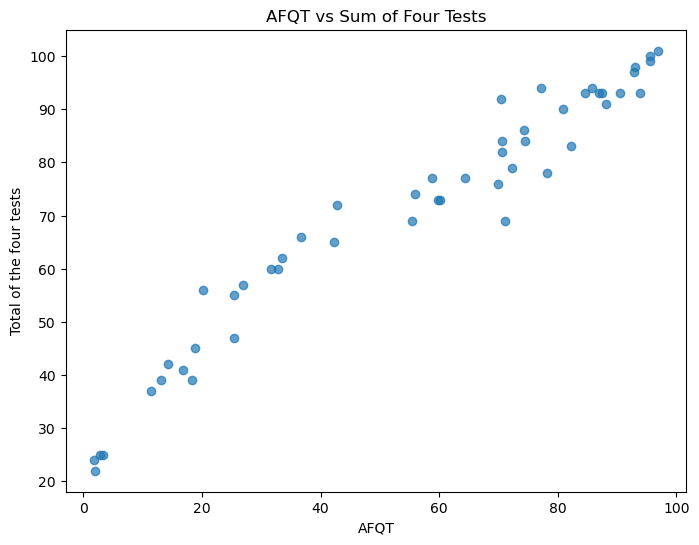

Correlation: 0.971


In [6]:
# ========================================================
# Compare AFQT to the sum of the four test scores
# ========================================================

# Row sums of Word, Parag, Math, and Arith
four_tests_sum = AFQT_sub[["Word", "Parag", "Math", "Arith"]].sum(axis=1)
# .sum(axis=1) adds up values across columns for each row (axis=1 = horizontal sum).
# axis=0 would mean vertical sum (down a column).

# Scatter plot: AFQT vs sum of the four tests
plt.figure(figsize=(8, 6))   # make the plot 8x6 inches
plt.scatter(AFQT_sub["AFQT"], four_tests_sum, alpha=0.7)
plt.xlabel("AFQT")
plt.ylabel("Total of the four tests")
plt.title("AFQT vs Sum of Four Tests")
plt.show()
# plt.scatter() makes a scatter plot: each dot is one person.
# X-axis = AFQT, Y-axis = raw sum of the four test scores.

# Calculate correlation between AFQT and raw sum
correlation = np.corrcoef(AFQT_sub["AFQT"], four_tests_sum)[0, 1]
print(f"Correlation: {correlation:.3f}")
# np.corrcoef() calculates correlation (strength of linear relationship).
# [0,1] extracts the correlation value from the matrix.
# Even though the correlation is very high (0.971), AFQT is NOT simply a raw sum.

In [7]:
# ========================================================
# For simplicity, give each person a shorter row label
# ========================================================

# Replace row labels (index) with p1, p2, ..., p50
AFQT_sub.index = [f"p{i+1}" for i in range(len(AFQT_sub))]
# .index controls row labels (like row names in R or Excel).
# f"p{i+1}" is a formatted string: for i=0, becomes "p1"; for i=49, becomes "p50".
# range(len(AFQT_sub)) generates numbers 0–49, and +1 shifts them to 1–50.

print("Row labels:", AFQT_sub.index.tolist())
# Now each person is labeled p1, p2, ..., p50 instead of random row numbers.

# Create a smaller dataset with just Word and Parag
# (we’ll use this for an initial PCA demonstration)
data_AFQT = AFQT_sub[["Word", "Parag"]].copy()
print(data_AFQT.head())
# This smaller dataset keeps only the Word and Parag test scores.
# We’ll use it soon to demonstrate PCA in a simple 2D case.


Row labels: ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50']
    Word  Parag
p1    33     14
p2    35     14
p3    19     10
p4    28     11
p5    32     14


Centered data means: [-0. -0.]
Original data means: [26.3 11.3]
Centered data std: [3.34572527 7.74399043]
Original data std: [7.74399043 3.34572527]


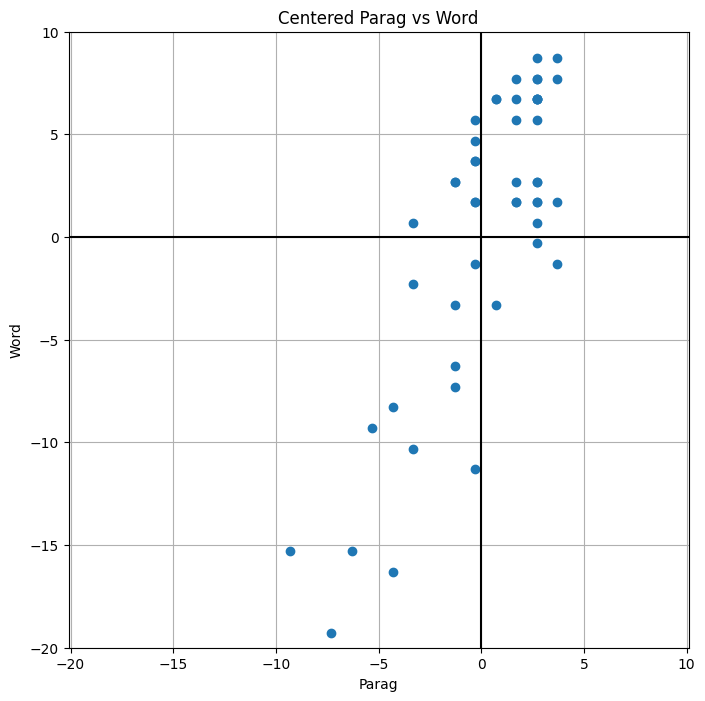

In [ ]:
 # ==================================================================================
# 3.1 Motivations/Interpretations of PCA
# ==================================================================================

# 3.1.1 PCA for only two tests
# Let us focus on Word and Parag first. We want to use one aggregated score or weighted sum of two scores with the following desirable properties:
#
# The new score is weighted sum of Word and Parag, i.e., a linear combination of the two.
# The two scores should be close to the newly formed one score.
# In another word, we are looking for a line going through the cloud of the scatter plot of Word vs. Parag with minimum overall perpendicular distance.

# 3.1.2 Geometric interpretations
# The crux of PCA can be captured simply by a plot. Focus on the plots in this section.
#
# To demonstrate what are PC's and the geometric properties of PCA, let us look at the scatter plots with centered word and parag scores. I.e., we subtract word by its mean and parag by its mean as well. We call this process centering the data. Positive centered score implies the raw score is above the mean and below the mean if it is negative.

# Center the data (subtract means)
scaler_center_only = StandardScaler(with_mean=True, with_std=False)
parag_word_centered = pd.DataFrame(
    scaler_center_only.fit_transform(AFQT_sub[["Parag", "Word"]]),
    columns=["Parag", "Word"],
    index=AFQT_sub.index
)

# StandardScaler() is a tool for standardizing data
# with_mean=True means subtract the mean (center the data)
# with_std=False means don't divide by standard deviation (don't scale, just center)
# .fit_transform() does two things: 1) calculates the means, 2) subtracts means from all values
# pd.DataFrame() converts the result back to a labeled table format
# columns=["Parag", "Word"] assigns column names
# index=AFQT_sub.index keeps the same row names (p1, p2, etc.)

# Notice the original and centered data only differ by the mean values while keep the same standard deviations.
print("Centered data means:", np.round(parag_word_centered.mean().values, 3))
print("Original data means:", AFQT_sub[["Word", "Parag"]].mean().values)
print("Centered data std:", parag_word_centered.std().values)
print("Original data std:", AFQT_sub[["Word", "Parag"]].std().values)

# .mean() calculates the average of each column
# .values extracts just the numbers (without column labels)
# np.round(..., 3) rounds to 3 decimal places
# .std() calculates standard deviation (measure of spread)
# Centering shifts the data so the average becomes 0, but spread stays the same

# Look at the scatter plot of centered word and parag:
plt.figure(figsize=(8, 8))
plt.scatter(parag_word_centered["Parag"], parag_word_centered["Word"])
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel("Parag")
plt.ylabel("Word")
plt.title("Centered Parag vs Word")
plt.axis('equal')
plt.xlim(-20, 10)
plt.ylim(-20, 10)
plt.grid(True)
plt.show()

# plt.axvline(x=0) draws a vertical line at x=0 (through the center)
# plt.axhline(y=0) draws a horizontal line at y=0 (through the center)
# plt.axis('equal') makes the x and y axes have the same scale
# plt.xlim(-20, 10) sets the x-axis range from -20 to 10
# plt.ylim(-20, 10) sets the y-axis range from -20 to 10
# plt.grid(True) adds a grid to make the plot easier to read
# Now the data cloud is centered at the origin (0,0)

# PC1, first principal component: the linear combination of the two scores which minimizes the total squared perpendicular distance. That line is described by the PCA function.
#
# PC1 loadings: for example (0.3, 0.96) which describes the direction of the line.
# PC1 scores: the projection score 0.3 * Parag_centered + 0.96 * Word_centered.
# As an example, for the person with Parag_centered = 4.58 and Word_centered = 5.08, the PC score is 0.3*4.58 + 0.96*5.08 = 6.25
#
# How much information lost using PC1?
#
# Instead of using word and parag we only use PC1's. We will lose on average Mean sum of squared distances.


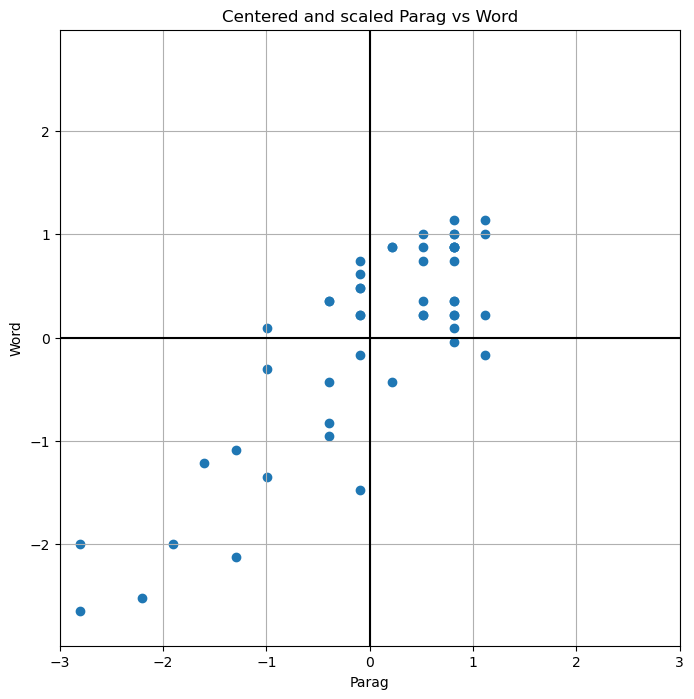

In [8]:
# 3.1.3 Two interpretations of PCA
# The above PC scores may have one problem: the two tests have different spread or standard deviation. Often we may want to find PC's among totally different variables with different units. In this case, it is a good idea to center and scale the data, by subtracting the mean and dividing the standard deviation for each test first, before performing PCA.

scaler_full = StandardScaler(with_mean=True, with_std=True)
parag_word_scaled_centered = pd.DataFrame(
    scaler_full.fit_transform(AFQT_sub[["Parag", "Word"]]),
    columns=["Parag", "Word"],
    index=AFQT_sub.index
)

# Now with_std=True means also divide by standard deviation (standardize completely)
# This makes both variables have mean=0 and standard deviation=1
# This is important when variables have different units or very different scales

plt.figure(figsize=(8, 8))
plt.scatter(parag_word_scaled_centered["Parag"], parag_word_scaled_centered["Word"])
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel("Parag")
plt.ylabel("Word")
plt.title("Centered and scaled Parag vs Word")
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()

# Now both axes have the same scale (-3 to +3) because both variables were standardized
# This ensures neither variable dominates the analysis just because it has a larger scale

# In the above plot we want to demonstrate the following beautiful geometric interpretation of PCA.
#
# Fact 1: A line which minimize the total squared distance must go through the origin (or sample means)
#
# Fact 2: By the Pythagorean theorem, for any point:
# PC score² + Perpendicular distance² = Distance to origin²
#
# Adding all the terms for each point, we have the following striking relationship:
# Sum(PC score²)/(n-1) + Sum(Perpendicular distance²)/(n-1) = Sum(Distance to origin²)/(n-1)
#
# Notice:
# Sum(Distance to origin²) never changes.
# Sum(PC score²)/(n-1) = Var(PC scores)
# Sum(Perpendicular distance²)/(n-1) = Mean squared errors
#
# Hence, maximizing the variance of PC scores is equivalent to minimizing the mean squared error (perpendicular distances). Note that minimizing the mean perpendicular distances here is different from simple linear regression that minimizes the vertical distances between the linear line and points. Now we are ready to reveal two equivalent definitions of PC's:
#
# Definition 1: The linear combination which minimizes the total squared perpendicular distance
#
# Definition 2: The linear combination with maximum variance or with largest spread

In [9]:
# 3.1.4 Other Principal Components
# Once we find the leading principal component, we can look for the second linear combination of the Word and Parag such that the line goes through the data points with minimum squared distance or largest variance but with one constraint - the line needs to be perpendicular to the first principal component. We call that line, second Principal component.
#
# By the definition we know the variance of PC1 is larger variance of PC2.
#
# If we only use PC1, we will lose some information contained in two scores. The error is described by Sum of squared error or we can use variance of the PC1.
#
# If we use both PC1 and PC2 we do not lose any information at all. In another word the variance of PC1 plus variance of PC2 is exactly variance of word + variance of parag!
#
# We can have maximum 2 PCs when there are only two variables.


In [10]:
# ==================================================================================
# 4 Principal Component of Word, Math, Parag and Arith
# ==================================================================================

# Our goal is to use less number of variables to capture the information contained in 4 scores. We hope using a few Principal components to capture the structure among all variables. Often the clustering information may appear in PC coordinates. If we are lucky enough we may discover clear interpretations of each PC's in terms of the original scores. In general we may lose interpretation from each score.
#
# There will be no more than 4 PC's since there are only 4 variables. Each PC will be controlled by the loadings or the weights to each variable. All 4 sets of loadings are orthogonal with unit 1. All 4 PC's are also orthogonal or uncorrelated with decreasing variances.
#
# Question:
#
# What does each PC score mean?
# How many PC's should be used?
# What interesting facts can be revealed by PCs?

# 4.1 Find PC's and Loadings
# The main function used to give us all the loadings and PC's and variances of each PC. You will find simple, beautiful mathematics how PCA is done through eigen decomposition and SVD (Singular Value Decomposition) in Appendix.
#
# To conduct PCA:
#
# Step I: To find sensible PC's, we recommend to
# center each variable by subtracting its mean
# scale each variable by dividing its std (rather complex on this issue)
#
# Step II: Run PCA
# Output all the loadings: one set for each PC's
# Obtain all PC scores
# Report the variances for each PC and for each original variable

# We next perform PCA's for four variables Word, Parag, Math, Arith.

data_AFQT = AFQT_sub[["Word", "Parag", "Math", "Arith"]].copy()

# Standardize the data (center and scale)
scaler = StandardScaler()
data_AFQT_scaled = scaler.fit_transform(data_AFQT)

# Important note about StandardScaler:
# sklearn's StandardScaler uses population variance (dividing by n) rather than sample variance (dividing by n-1)
# This means the total variance will be slightly > number of variables
print("=== Standardization Information ===")
print(f"Original data shape: {data_AFQT.shape}")
print(f"Standardized data shape: {data_AFQT_scaled.shape}")
print("Means of standardized data (should be ~0):")
print(np.round(data_AFQT_scaled.mean(axis=0), 6))
print("Standard deviations of standardized data (should be ~1):")
print(np.round(data_AFQT_scaled.std(axis=0, ddof=0), 6))  # ddof=0 matches sklearn
print("Variances with sklearn's method (ddof=0):")
print(np.round(data_AFQT_scaled.var(axis=0, ddof=0), 6))
print("Variances with sample method (ddof=1):")
print(np.round(data_AFQT_scaled.var(axis=0, ddof=1), 6))
total_var_sklearn = np.sum(data_AFQT_scaled.var(axis=0, ddof=0))
total_var_sample = np.sum(data_AFQT_scaled.var(axis=0, ddof=1))
print(f"Total variance (sklearn method): {total_var_sklearn:.6f}")
print(f"Total variance (sample method): {total_var_sample:.6f}")
print(f"Expected total for 4 variables with sklearn: {4.0:.6f}")
print(f"Expected total with sample correction: {4 * len(data_AFQT_scaled)/(len(data_AFQT_scaled)-1):.6f}")

# Perform PCA
pca_4 = PCA()
pc_scores = pca_4.fit_transform(data_AFQT_scaled)

print("PCA attributes:")
print("- components_: loadings")
print("- explained_variance_: variances of PCs")
print("- explained_variance_ratio_: proportion of variance explained")
print("- n_components_: number of components")

# This code performs PCA on our four test scores.
# First, data_AFQT = AFQT_sub[["Word", "Parag", "Math", "Arith"]].copy() selects just the four test columns we want to analyze
# StandardScaler() creates a tool to standardize our data
# scaler.fit_transform(data_AFQT) both calculates the means/standard deviations and applies the standardization
# PCA() creates a PCA analysis tool
# pca_4.fit_transform(data_AFQT_scaled) both calculates the principal components and transforms our data into PC scores
# The PCA object stores several important results:
# - components_ contains the loadings (weights for each variable in each PC)
# - explained_variance_ contains the variance of each PC
# - explained_variance_ratio_ shows what proportion of total variance each PC explains

# PCA outputs the following:
# components_: loadings
# PC scores: transformed data
# explained_variance_: variances of each PC
# mean_: means of the four tests

# Loadings
# Each loadings give us a set of four numbers which determine the direction of each line. Let us take a look at the leading PC's loadings:

pc_4_loading = pca_4.components_.T  # Transpose to match original format
pc_4_loading = pd.DataFrame(pc_4_loading,
                           columns=['PC1', 'PC2', 'PC3', 'PC4'],
                           index=['Word', 'Parag', 'Math', 'Arith'])
print("PC Loadings:")
print(pc_4_loading.round(3))

# The loadings tell us how much each original variable contributes to each principal component
# pca_4.components_ contains the loadings but with PCs as rows and variables as columns
# .T transposes the matrix (flips rows and columns) to match the conventional format where variables are rows and PCs are columns
# pd.DataFrame() converts it to a labeled table with proper row and column names
# Each number in the loading matrix represents the weight or coefficient for that variable in that principal component
# For example, if PC1 has loadings [0.5, 0.5, 0.5, 0.5], it means PC1 is roughly the average of all four tests
# .round(3) rounds the numbers to 3 decimal places for easier reading

# Remark:
# Loadings are unique up to sign. For example PC1 loading can be (.51, .50, .5, .5) or (-.51, -.50, -.5, -.5). Why so???
# The magnitude of loadings tells us how much each variable contributes to the PC's.


=== Standardization Information ===
Original data shape: (50, 4)
Standardized data shape: (50, 4)
Means of standardized data (should be ~0):
[-0. -0.  0. -0.]
Standard deviations of standardized data (should be ~1):
[1. 1. 1. 1.]
Variances with sklearn's method (ddof=0):
[1. 1. 1. 1.]
Variances with sample method (ddof=1):
[1.020408 1.020408 1.020408 1.020408]
Total variance (sklearn method): 4.000000
Total variance (sample method): 4.081633
Expected total for 4 variables with sklearn: 4.000000
Expected total with sample correction: 4.081633
PCA attributes:
- components_: loadings
- explained_variance_: variances of PCs
- explained_variance_ratio_: proportion of variance explained
- n_components_: number of components
PC Loadings:
         PC1    PC2    PC3    PC4
Word   0.500 -0.496  0.473  0.529
Parag  0.500 -0.501 -0.521 -0.477
Math   0.497  0.546 -0.481  0.472
Arith  0.503  0.453  0.523 -0.519


In [11]:
# PC's
# We can get PC's by taking the linear combination of loadings and variables as:
# PC1 = 0.509 × Word_centered_scaled + 0.5 × Parag_centered_scaled + 0.496 × Math_centered_scaled + 0.494 × Arith_centered_scaled
# PC2 = -0.442 × Word_centered_scaled + -0.546 × Parag_centered_scaled + 0.483 × Math_centered_scaled + 0.523 × Arith_centered_scaled
# We will continue to get PC3, PC4.
# All the PC's are computed. Each person will have four PC scores. Let us take PC's for the first 5 people

pc_scores_df = pd.DataFrame(pc_scores,
                           columns=['PC1', 'PC2', 'PC3', 'PC4'],
                           index=AFQT_sub.index)
print("\nPC Scores (first 5 people):")
print(pc_scores_df.head().round(3))

# This creates a DataFrame containing the PC scores for each person
# pc_scores contains the numerical results from PCA
# pd.DataFrame() converts it to a labeled table format
# columns=['PC1', 'PC2', 'PC3', 'PC4'] assigns names to each principal component
# index=AFQT_sub.index uses the same row names (p1, p2, etc.) as our original data
# The PC scores are the new coordinates for each person in the principal component space
# Each person's original four test scores get transformed into four PC scores using the loadings as weights
# .head() shows just the first 5 rows, .round(3) rounds to 3 decimal places

# Interpretations of loadings and PC's
# Loadings determine contribution of each variable to the PC's. Loadings are also proportional to the correlations between PC's and each variables.

print("PC1 and PC2 loadings:")
print(pc_4_loading[['PC1', 'PC2']].round(3))

# This displays just the first two principal components for easier interpretation
# pc_4_loading[['PC1', 'PC2']] selects only the PC1 and PC2 columns from our loadings table
# The double square brackets [['PC1', 'PC2']] select multiple columns

# PC1: since the four loadings are approximately the same around .5 so PC1 is proportional to the total of the four scores. In another word:
# PC1 = .5 × (Word_centered_scaled + Parag_centered_scaled + Math_centered_scaled + Arith_centered_scaled)
# Higher PC1 ⇒ Higher weighted total score.
#
# PC2:
# PC2 ≈ -0.5×(Word + Parag) + 0.5×(Math + Arith)
# Higher PC2 = stronger math skills, Lower PC2 = stronger language skills
#
# Approximately proportional to the difference between to sum of Math/Arith and sum of Word and Parag
# If total scores are comparable, higher PC2 implies strong math talent while lower PC2 implies superior language ability

# Combine centered and scaled Word, Parag, Math, Arith and PC1, PC2, PC3 PC4. We list a few people's scores and PCs. Can you calculate the PC's from the Word, Parag… Arith using the loadings?



PC Scores (first 5 people):
      PC1    PC2    PC3    PC4
p1  1.565 -0.145  0.239 -0.178
p2  1.627 -0.336  0.291  0.031
p3 -1.748 -0.401 -0.323 -0.234
p4 -0.138 -0.259  0.057  0.255
p5  2.166  0.610 -0.054 -0.022
PC1 and PC2 loadings:
         PC1    PC2
Word   0.500 -0.496
Parag  0.500 -0.501
Math   0.497  0.546
Arith  0.503  0.453


In [12]:
# Combine standardized original data with PC scores
AFQT_PC_Scores = pd.DataFrame(data_AFQT_scaled,
                             columns=['Word', 'Parag', 'Math', 'Arith'],
                             index=AFQT_sub.index)
AFQT_PC_Scores = pd.concat([AFQT_PC_Scores, pc_scores_df], axis=1)

# Sort by PC1 in descending order and show top 6
print("Top 6 people by PC1 score:")
print(AFQT_PC_Scores.sort_values('PC1', ascending=False).head(6).round(3))

# This code combines the standardized original test scores with the PC scores into one table
# pd.DataFrame(data_AFQT_scaled, ...) creates a table from the standardized test scores
# columns=['Word', 'Parag', 'Math', 'Arith'] assigns column names
# pd.concat([AFQT_PC_Scores, pc_scores_df], axis=1) joins two DataFrames together
# axis=1 means adding columns side by side (axis=0 would stack rows)
# .sort_values('PC1', ascending=False) sorts the rows by PC1 values from highest to lowest
# .head(6) shows the top 6 rows (people with highest PC1 scores)
# This lets us see which people scored highest on the first principal component

# Loadings and correlations between PC and each scores:
# Loadings account for weights for each variable in the PC. They are in fact proportional to the correlation between PC to each score with sd(PC) as a factor. For example
# Corr(PC1, data_AFQT_scaled) = sd(PC1) × PC1_loadings (Check this please)

Top 6 people by PC1 score:
      Word  Parag   Math  Arith    PC1    PC2    PC3    PC4
p8   0.874  0.815  1.580  1.484  2.376  0.691  0.004  0.049
p13  1.004  0.815  1.425  1.348  2.296  0.481  0.069  0.116
p5   0.744  0.815  1.425  1.348  2.166  0.610 -0.054 -0.022
p14  1.004  0.513  1.425  1.348  2.145  0.632  0.226  0.260
p9   1.004  0.815  1.580  0.802  2.099  0.318 -0.290  0.472
p33 -0.170  1.117  1.425  1.484  1.928  0.973 -0.573 -0.720


In [ ]:
# Calculate correlations between PC1 and each standardized test
correlations_pc1 = np.corrcoef(pc_scores[:, 0], data_AFQT_scaled.T)[0, 1:]
print("\nCorrelations of PC1 with each test:")
correlation_dict = dict(zip(['Word', 'Parag', 'Math', 'Arith'], correlations_pc1.round(3)))
print(correlation_dict)

# This calculates how strongly PC1 correlates with each of the original test scores
# pc_scores[:, 0] selects all rows (:) and the first column (0) which is PC1
# .T transposes the data because np.corrcoef expects variables as rows
# data_AFQT_scaled.T transposes our standardized test data
# np.corrcoef() computes correlation coefficients between all pairs of variables
# [0, 1:] extracts the first row starting from the second column, giving us the correlations between PC1 and each test
# dict(zip(...)) combines the test names with their correlation values into a dictionary for easy reading
# High correlations (near 1.0) show PC1 is strongly related to all tests



Correlations of PC1 with each test:
{'Word': np.float64(0.914), 'Parag': np.float64(0.913), 'Math': np.float64(0.908), 'Arith': np.float64(0.918)}


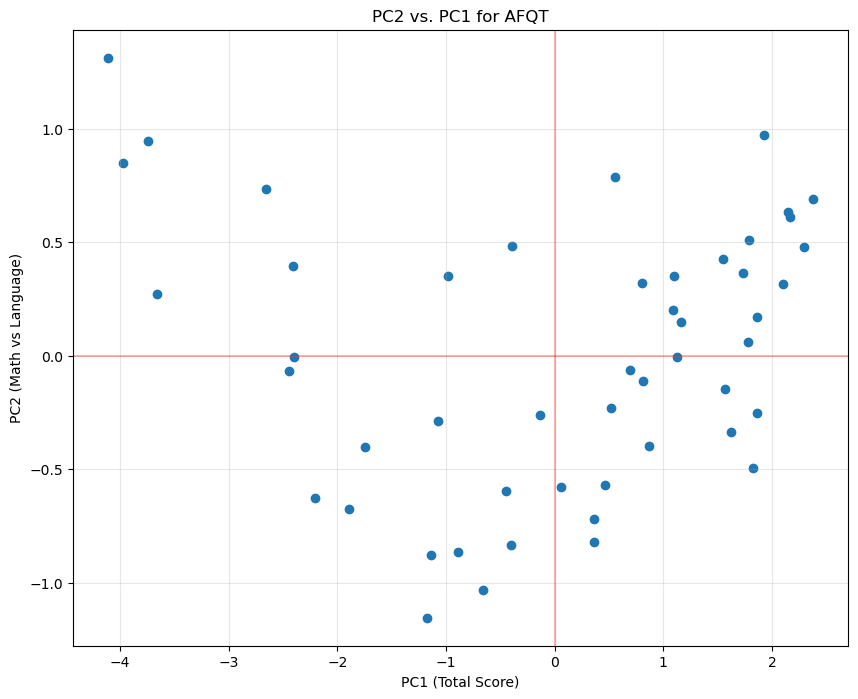

In [13]:
# 4.2 Scatter plot of PCs
# Often a scatter plot of PC's may reveal interesting information. For example we know PC1 and PC2 have clear interpretation, by plotting PC2 vs. PC1, we can locate people with different strengths.

plt.figure(figsize=(10, 8))
plt.scatter(pc_scores_df['PC1'], pc_scores_df['PC2'])
plt.axvline(x=0, color='red', linestyle='-', alpha=0.3)
plt.axhline(y=0, color='red', linestyle='-', alpha=0.3)
plt.xlabel('PC1 (Total Score)')
plt.ylabel('PC2 (Math vs Language)')
plt.title('PC2 vs. PC1 for AFQT')
plt.grid(True, alpha=0.3)
plt.show()

# This scatter plot shows each person as a dot positioned by their PC1 and PC2 scores
# plt.scatter(pc_scores_df['PC1'], pc_scores_df['PC2']) plots PC1 on x-axis and PC2 on y-axis
# The vertical and horizontal lines at zero (axvline and axhline) divide the plot into quadrants
# alpha=0.3 makes the lines and grid semi-transparent
# People on the far right have high total scores (high PC1)
# People in the upper quadrant have strong math skills (high PC2)
# People in the lower quadrant have strong language skills (low PC2)

In [ ]:
# 4.3 Properties of PC's and Loadings
# All loadings are perpendicular and with unit 1

print("Checking loadings are orthogonal (perpendicular) with unit length:")
print("Loadings dot product matrix (should be identity matrix):")
print(np.round(pc_4_loading.T @ pc_4_loading, 3))

print("\nColumn sums of squared loadings (should all be 1):")
print((pc_4_loading**2).sum(axis=0).values)

# This checks that the loadings satisfy the mathematical requirements for PCA
# @ is the matrix multiplication operator (dot product)
# pc_4_loading.T @ pc_4_loading multiplies the transpose of loadings with itself
# This should give an identity matrix (1s on diagonal, 0s elsewhere) if loadings are orthogonal
# (pc_4_loading**2).sum(axis=0) squares each loading and sums down columns
# Each sum should be 1, meaning each set of loadings has unit length (normalized)

# var(PC1) > var(PC2) > ... and they add up to total variance in standardized data
print("Variances of each PC:")
pc_variances = pca_4.explained_variance_
print(np.round(pc_variances, 2))
print(f"Sum of PC variances: {np.sum(pc_variances):.2f}")

# Detailed variance check
print("\n=== STEP 4: PCA Variance Components ===")
print("Individual PC variances:")
for i, var in enumerate(pc_variances):
    print(f"  PC{i+1}: {var:.6f}")

total_variance = np.sum(data_AFQT_scaled.var(axis=0, ddof=0))  # Use sklearn's method
print(f"Sum of PC variances: {np.sum(pc_variances):.6f}")
print(f"Total variance in standardized data (sklearn method): {total_variance:.6f}")
print(f"Difference: {np.sum(pc_variances) - total_variance:.8f}")
print("This should be nearly zero, confirming PCA preserves total variance")

# pca_4.explained_variance_ contains the variance of each principal component
# These should be in decreasing order (PC1 has highest variance, then PC2, etc.)
# The sum of all PC variances equals the total variance in the standardized data
# Note: This will be slightly > 4 because sklearn's StandardScaler uses population variance (n)
# rather than sample variance (n-1) for standardization
# Notice var(PC1) is much larger than the rest of the variances. PC1 captures large amount of variability in the data.

# All 4 PC scores are uncorrelated

print("Covariance matrix of PC scores (should be diagonal):")
print(np.round(np.cov(pc_scores.T), 4))
# STEP 5: Manual PC Variance Calculation Check
print("\n=== STEP 5: Manual PC Variance Calculation ===")
manual_variances = []
for i in range(4):
    pc_scores_i = pc_scores[:, i]
    manual_var = np.var(pc_scores_i, ddof=1)
    manual_variances.append(manual_var)
    print(f"PC{i+1} manual variance: {manual_var:.6f}")
    print(f"PC{i+1} sklearn variance: {pc_variances[i]:.6f}")
    print(f"Difference: {abs(manual_var - pc_variances[i]):.8f}")

# STEP 6: Degrees of Freedom Check
print("\n=== STEP 6: Degrees of Freedom Analysis ===")
n = data_AFQT_scaled.shape[0]
print(f"Sample size (n): {n}")
print(f"sklearn uses population variance (n): variance = Σ(x-μ)²/n")
print(f"Sample variance uses (n-1): variance = Σ(x-μ)²/(n-1)")
var_ddof0 = np.sum(data_AFQT_scaled.var(axis=0, ddof=0))
var_ddof1 = np.sum(data_AFQT_scaled.var(axis=0, ddof=1))
print(f"Total variance with ddof=0 (sklearn): {var_ddof0:.6f}")
print(f"Total variance with ddof=1 (sample): {var_ddof1:.6f}")
print(f"Ratio: {var_ddof1/var_ddof0:.6f} = {n}/{n-1}")
# np.cov(pc_scores.T) calculates the covariance matrix between all PC scores
# .T transposes because np.cov expects variables as rows
# The result should be a diagonal matrix (zeros off the diagonal) showing PCs are uncorrelated
# The diagonal values are the variances of each PC

# From the following pair-wise plots we see the variability of each PC's in a decreasing scale.
# ==================================================================================
# Important Note: Understanding Variance in PCA
# ==================================================================================
print("\n=== STEP 9: Final Variance Analysis ===")
n = len(data_AFQT_scaled)
actual_total = np.sum(pca_4.explained_variance_)
sklearn_expected = 4.0  # sklearn standardizes to unit variance with ddof=0
sample_expected = 4 * n / (n - 1)

print(f"Sample size (n): {n}")
print(f"Actual PC variance sum: {actual_total:.6f}")
print(f"Expected with sklearn standardization: {sklearn_expected:.6f}")
print(f"Expected with sample correction: {sample_expected:.6f}")
print(f"Difference from sklearn expected: {abs(actual_total - sklearn_expected):.8f}")
print(f"Difference from sample expected: {abs(actual_total - sample_expected):.8f}")

if abs(actual_total - sklearn_expected) < 1e-10:
    print("✓ PERFECT: Variance sum matches sklearn's standardization exactly")
elif abs(actual_total - sample_expected) < 1e-6:
    print("✓ CORRECT: Variance sum matches sample correction (n-1 method)")
else:
    print("⚠ WARNING: Unexpected variance sum")

print("\nKey insight: sklearn's StandardScaler uses population variance (ddof=0),")
print("so total variance of standardized data equals the number of variables exactly.")


Checking loadings are orthogonal (perpendicular) with unit length:
Loadings dot product matrix (should be identity matrix):
     PC1  PC2  PC3  PC4
PC1  1.0 -0.0  0.0 -0.0
PC2 -0.0  1.0 -0.0 -0.0
PC3  0.0 -0.0  1.0 -0.0
PC4 -0.0 -0.0 -0.0  1.0

Column sums of squared loadings (should all be 1):
[1. 1. 1. 1.]
Variances of each PC:
[3.4  0.35 0.18 0.15]
Sum of PC variances: 4.08

=== STEP 4: PCA Variance Components ===
Individual PC variances:
  PC1: 3.404303
  PC2: 0.350630
  PC3: 0.175929
  PC4: 0.150771
Sum of PC variances: 4.081633
Total variance in standardized data (sklearn method): 4.000000
Difference: 0.08163265
This should be nearly zero, confirming PCA preserves total variance
Covariance matrix of PC scores (should be diagonal):
[[ 3.4043  0.      0.      0.    ]
 [ 0.      0.3506  0.      0.    ]
 [ 0.      0.      0.1759 -0.    ]
 [ 0.      0.     -0.      0.1508]]

=== STEP 5: Manual PC Variance Calculation ===
PC1 manual variance: 3.404303
PC1 sklearn variance: 3.404303
Dif

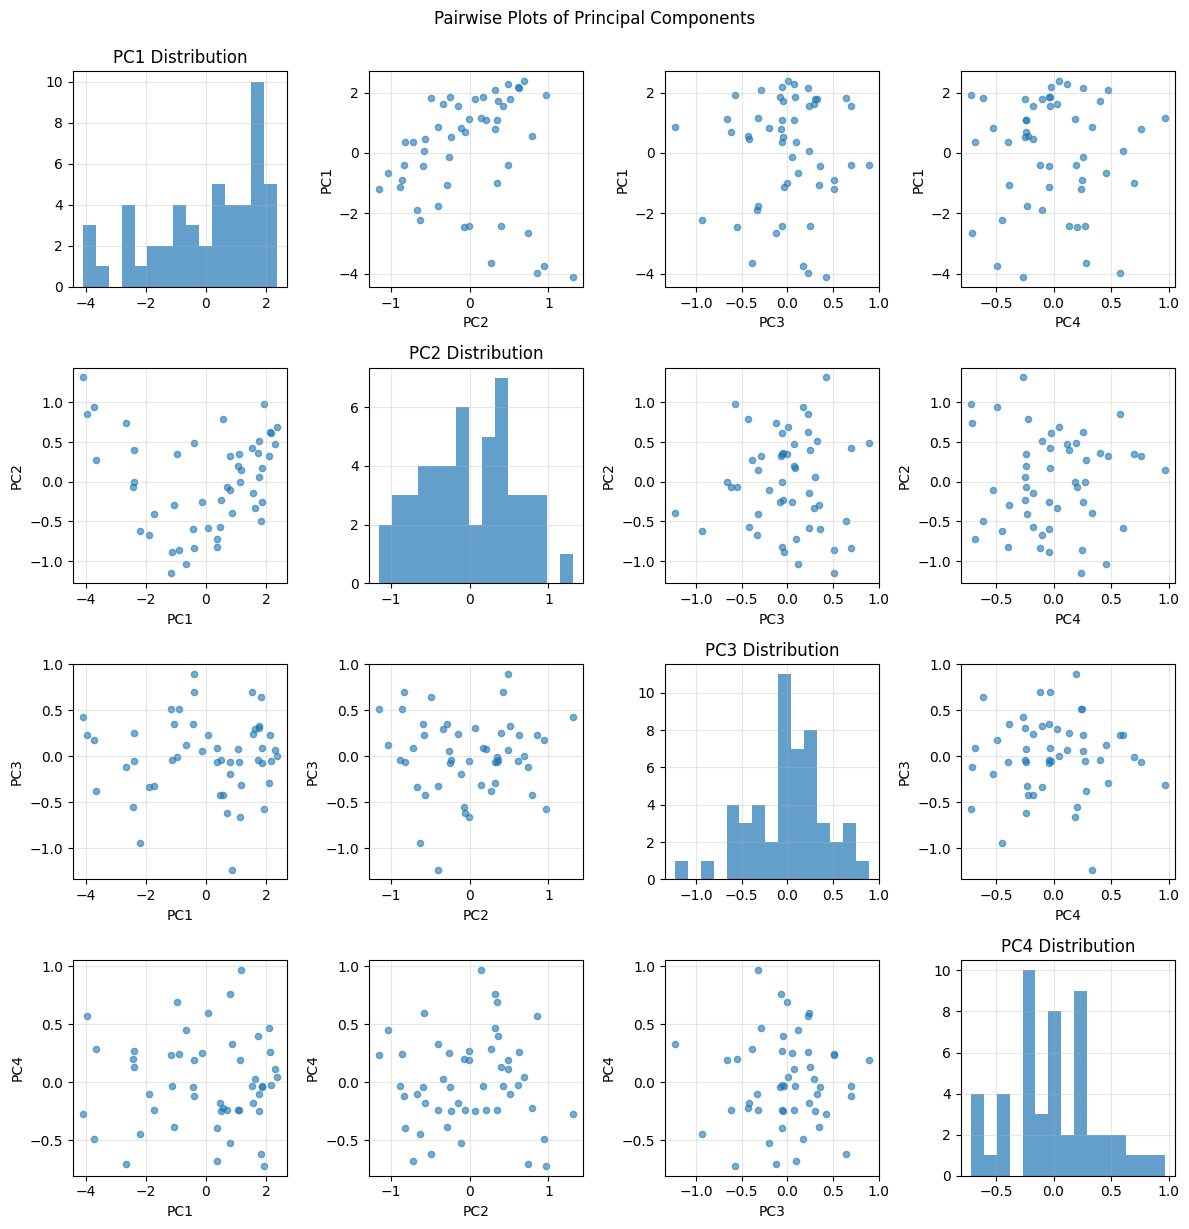

In [ ]:
# Create pairwise scatter plots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        if i == j:
            axes[i, j].hist(pc_scores[:, i], bins=15, alpha=0.7)
            axes[i, j].set_title(f'PC{i+1} Distribution')
        else:
            axes[i, j].scatter(pc_scores[:, j], pc_scores[:, i], alpha=0.6, s=20)
            axes[i, j].set_xlabel(f'PC{j+1}')
            axes[i, j].set_ylabel(f'PC{i+1}')
        axes[i, j].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Pairwise Plots of Principal Components', y=1.02)
plt.show()

# This creates a 4x4 grid of plots showing relationships between all pairs of PCs
# plt.subplots(4, 4) creates a 4x4 grid of subplot areas
# The diagonal shows histograms (distributions) of each PC
# Off-diagonal plots show scatter plots between pairs of PCs
# These should show no correlation (random clouds) since PCs are orthogonal


PCA Summary:
Standard deviation of each PC: [1.845 0.592 0.419 0.388]
Proportion of Variance Explained: [0.834 0.086 0.043 0.037]
Cumulative Proportion: [0.834 0.92  0.963 1.   ]


([<matplotlib.axis.XTick at 0x7a8cdb04f080>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

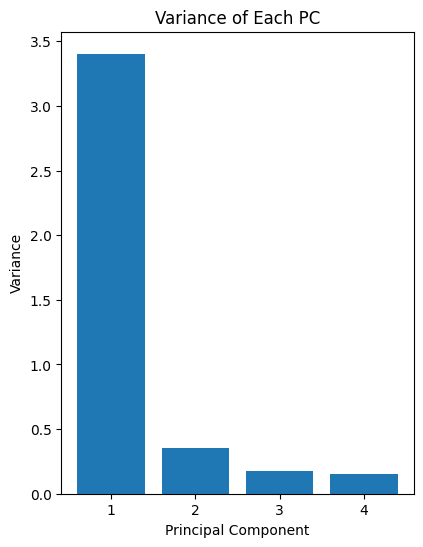

In [ ]:
# 4.4 Proportion of variance explained (PVE)
# One goal of principal component is to find as few as many PC's which have as large variances as possible. How many PC's are informative? We introduce the measurement of PVE: Proportion of Variance Explained as
#
# PVE=Var(PC's)/Total Variances
#
# We can calculate the PVE or get Proportion of variance from the output

print("PCA Summary:")
print("Standard deviation of each PC:", np.round(pca_4.explained_variance_**0.5, 3))
print("Proportion of Variance Explained:", np.round(pca_4.explained_variance_ratio_, 3))
print("Cumulative Proportion:", np.round(np.cumsum(pca_4.explained_variance_ratio_), 3))

# pca_4.explained_variance_**0.5 calculates standard deviations (square root of variances)
# pca_4.explained_variance_ratio_ shows what fraction of total variance each PC explains
# np.cumsum() calculates cumulative sums, showing total variance explained by first n PCs
# For example, if first PC explains 0.765, then first two PCs explain 0.887 total

# The summary reports standard deviations, PVE and Cumulative Proportions.
#
# For example, the leading principal component explains a large portion of the total variance.
#
# We also see clearly that variance of PC1 is larger than that of PC2 and etc.

# Scree Plots
#
# A scree plot of PVE or Cumulative PVE can help us to see how much variance is captured by each PC.

# Scree plot of variances:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), pca_4.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Variance of Each PC')
plt.xticks(range(1, 5))

# This creates a bar chart showing the variance of each principal component
# range(1, 5) creates the numbers 1, 2, 3, 4 for the x-axis labels
# plt.bar() creates bars with heights equal to the variances
# The bars should decrease in height from left to right (PC1 highest, PC4 lowest)

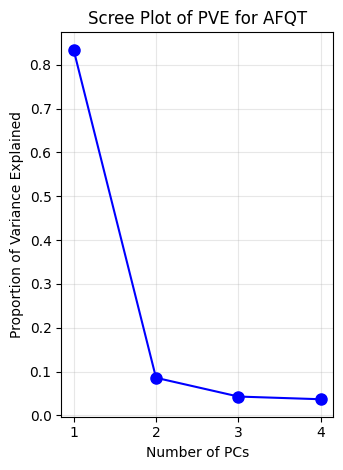

In [ ]:
# How many PC's to use?
#
# We may look at the scree plot of PVE's and apply elbow rules: take the number of PC's when there is a sharp drop in the scree plot.

# Here is the scree plot of PVE's.
plt.subplot(1, 2, 2)
plt.plot(range(1, 5), pca_4.explained_variance_ratio_, 'bo-', markersize=8)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot of PVE for AFQT')
plt.xticks(range(1, 5))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# This line plot shows the proportion of variance explained by each PC
# 'bo-' means blue circles connected by lines
# markersize=8 makes the circles larger for visibility
# The "elbow rule" suggests using PCs up to where there's a sharp drop (elbow) in the plot

# It indicates that two leading PC's should be enough for certain purposes.


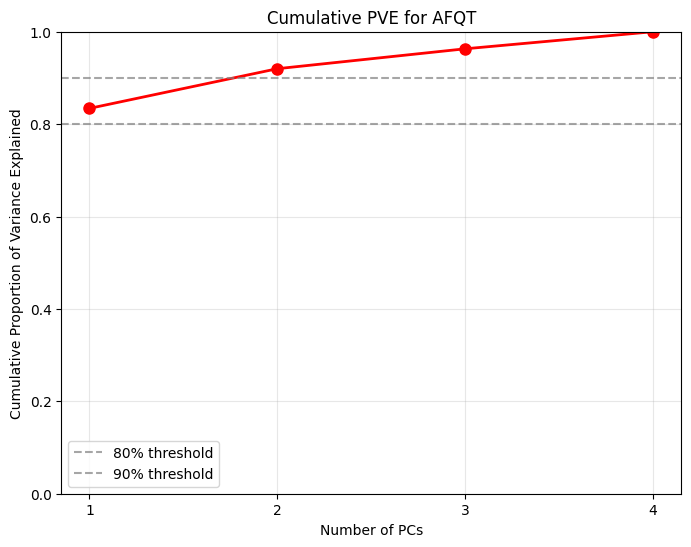

In [ ]:
# Lastly we may look at the cumulative variance explained by each PC

plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), np.cumsum(pca_4.explained_variance_ratio_), 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative PVE for AFQT')
plt.xticks(range(1, 5))
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7, label='80% threshold')
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.7, label='90% threshold')
plt.legend()
plt.show()

# This shows how much total variance is explained as we add more PCs
# np.cumsum() calculates running totals of variance explained
# 'ro-' means red circles connected by lines
# The horizontal dashed lines at 80% and 90% are common thresholds for deciding how many PCs to keep
# If the curve reaches 80% with 2 PCs, then 2 PCs might be sufficient


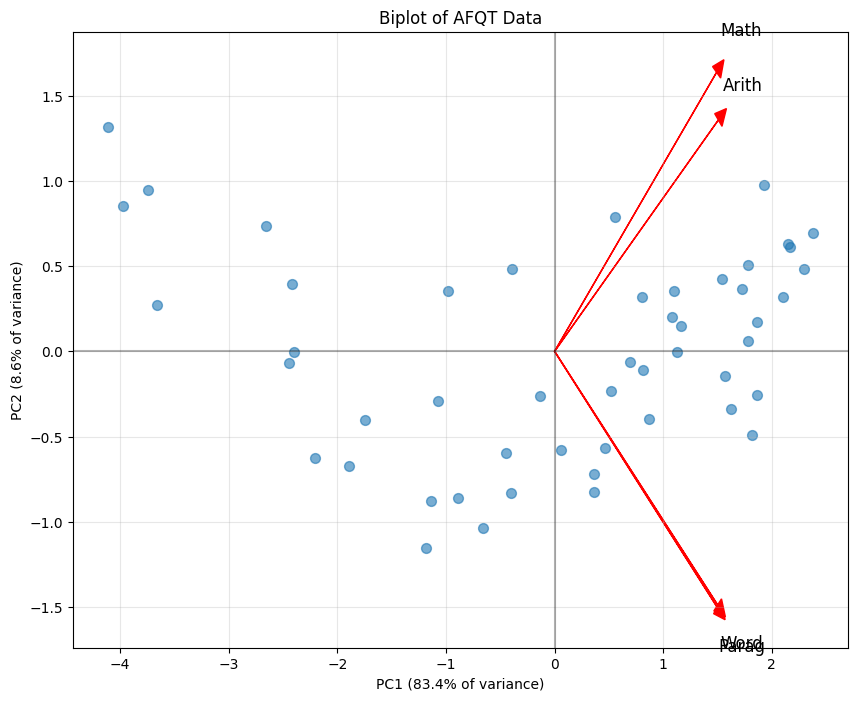

In [ ]:
# 4.5 biplot
# Visualize the PC scores together with the loadings of the original variables. They also reveal correlation structures among all variables.

# Create biplot
plt.figure(figsize=(10, 8))

# Plot PC scores (people)
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], alpha=0.6, s=50)

# Plot loadings (variables) as arrows
feature_names = ['Word', 'Parag', 'Math', 'Arith']
loadings = pca_4.components_[:2].T  # First two PCs only
scale_factor = 3  # Scale arrows for visibility

for i, (feature, loading) in enumerate(zip(feature_names, loadings)):
    plt.arrow(0, 0, loading[0]*scale_factor, loading[1]*scale_factor,
              head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(loading[0]*scale_factor*1.15, loading[1]*scale_factor*1.15,
             feature, fontsize=12, ha='center', va='center')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel(f'PC1 ({pca_4.explained_variance_ratio_[0]:.1%} of variance)')
plt.ylabel(f'PC2 ({pca_4.explained_variance_ratio_[1]:.1%} of variance)')
plt.title('Biplot of AFQT Data')
plt.grid(True, alpha=0.3)
plt.show()

# A biplot combines two types of information in one plot:
# 1. Scatter points show where each person falls in PC space
# 2. Red arrows show how the original variables relate to the PCs
# plt.arrow() draws arrows from the origin (0,0) to the loading coordinates
# The length and direction of arrows show how much each variable contributes to each PC
# Variables pointing in similar directions are positively correlated
# Variables pointing in opposite directions are negatively correlated
# The scale_factor makes the arrows visible (loadings are usually small numbers)

# The biplot indicates
# PC1 loadings are similar in magnitudes and with same signs
# PC2 captures diff of total of math, arith and total of word and parag
# math and arith are highly correlated so are word and parag!


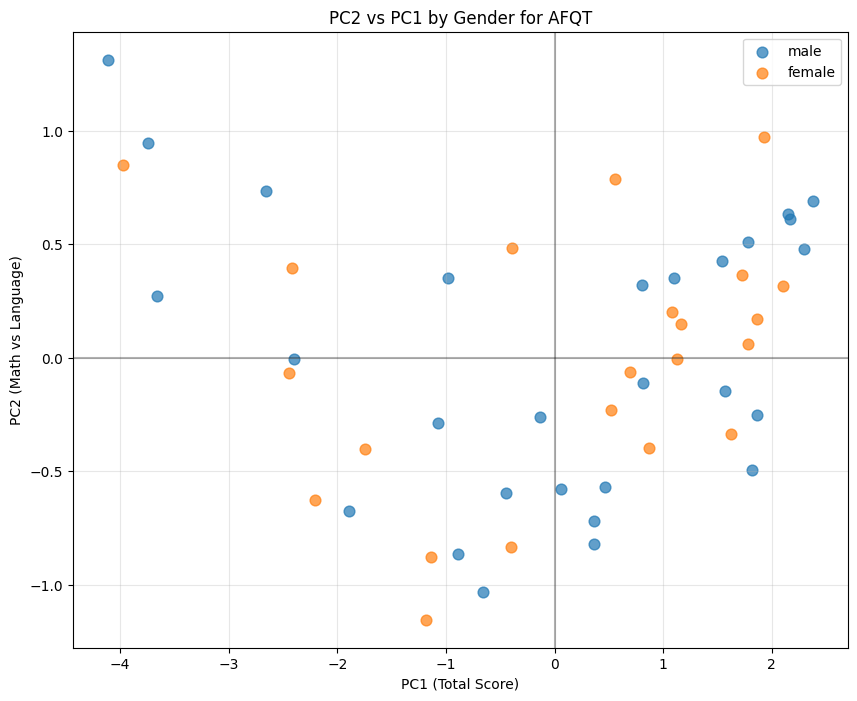

In [ ]:
# Gender effects?
# Are there systematic difference among men and women? By various plots of PC's we try to see any possible patterns.

plt.figure(figsize=(10, 8))

# Create scatter plot colored by gender
for gender in ['male', 'female']:
    mask = AFQT_sub['Gender'] == gender
    plt.scatter(pc_scores[mask, 0], pc_scores[mask, 1],
                label=gender, alpha=0.7, s=60)

plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('PC1 (Total Score)')
plt.ylabel('PC2 (Math vs Language)')
plt.title('PC2 vs PC1 by Gender for AFQT')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# This creates a scatter plot where points are colored by gender
# mask = AFQT_sub['Gender'] == gender creates a boolean array selecting only that gender
# pc_scores[mask, 0] selects PC1 scores only for that gender
# Different colors help us see if there are systematic patterns between males and females
# If there are gender differences, we might see clusters or separation in the plot

# For the 4-test AFQT subset (50 people): No clear gender pattern visible
# For the full 10-test dataset (2584 people): Clear gender separation on PC2


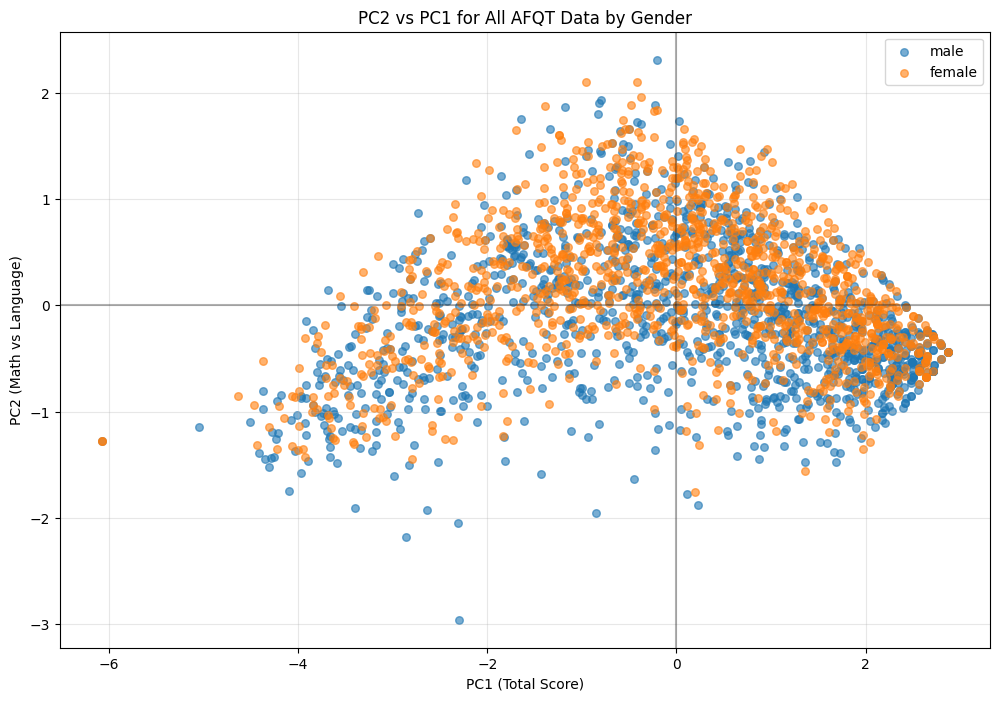

PC loadings for full dataset:
         PC1    PC2
Word   0.500  0.445
Parag  0.491  0.558
Arith  0.508 -0.451
Math   0.500 -0.535


In [ ]:
# Lastly AFQT PC's and Gender:
# So far the PCA is done for a subset of 50 subjects. Finally we bring all subjects and run PCA of over AFQT and Gender

pc_4_all = PCA()
data_AFQT_all = AFQT_full[['Word', 'Parag', 'Arith', 'Math']]
scaler_all = StandardScaler()
data_AFQT_all_scaled = scaler_all.fit_transform(data_AFQT_all)
pc_scores_all = pc_4_all.fit_transform(data_AFQT_all_scaled)

plt.figure(figsize=(12, 8))
for gender in ['male', 'female']:
    mask = AFQT_full['Gender'] == gender
    plt.scatter(pc_scores_all[mask, 0], pc_scores_all[mask, 1],
                label=gender, alpha=0.6, s=30)

plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('PC1 (Total Score)')
plt.ylabel('PC2 (Math vs Language)')
plt.title('PC2 vs PC1 for All AFQT Data by Gender')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Now we use the full dataset with all 2584 people instead of just 50
# This gives us more statistical power to detect gender differences
# data_AFQT_all selects the four test columns from the full dataset
# The rest of the analysis follows the same pattern as before
# With more data points, patterns might become more visible

print("PC loadings for full dataset:")
pc_4_all_loading = pd.DataFrame(pc_4_all.components_.T,
                                columns=['PC1', 'PC2', 'PC3', 'PC4'],
                                index=['Word', 'Parag', 'Arith', 'Math'])
print(pc_4_all_loading[['PC1', 'PC2']].round(3))

# Questions:
# - What are the PC1 and PC2 loadings?
# - What are the interpretations of PC1 and PC2?
# - Do you see systematic difference of AFQT scores between men and women?
# - How do you summarize the performance based on the above PC's plot?

In [ ]:

# 4.6 Summary
# To capture the main features of AFQT four scores we could use two newly formed PC scores:
#
# PC1: Total scores (weighted)
# PC2: Difference of the math+arith and word+parag
# What is AFQT score reported? Might it be the PC1's of the four tests? Or is it similar to the total scores?

correlation_afqt_pc1 = np.corrcoef(AFQT_full['AFQT'], pc_scores_all[:, 0])[0, 1]
print(f"Correlation between AFQT and PC1: {correlation_afqt_pc1:.3f}")

total_no_weight = AFQT_full[['Word', 'Parag', 'Math', 'Arith']].sum(axis=1)
correlation_afqt_total = np.corrcoef(AFQT_full['AFQT'], total_no_weight)[0, 1]
print(f"Correlation between AFQT and unweighted total: {correlation_afqt_total:.3f}")

# This compares the official AFQT score with our PC1 and with a simple sum
# np.corrcoef() calculates correlation between two variables
# [0, 1] extracts the correlation coefficient from the 2x2 correlation matrix
# High correlations (near 0.96-0.97) suggest AFQT is very similar to either PC1 or the simple total
# This helps us understand how the official AFQT score is constructed

# Final questions to ask: what happens if we run PCA without scaling?

# PCA on AFQT without scaling
pc_4_no_scale = PCA()
pc_scores_no_scale = pc_4_no_scale.fit_transform(data_AFQT_all)  # No scaling applied

print("\nPCA without scaling - PC loadings:")
pc_no_scale_loading = pd.DataFrame(pc_4_no_scale.components_.T,
                                   columns=['PC1', 'PC2', 'PC3', 'PC4'],
                                   index=['Word', 'Parag', 'Arith', 'Math'])
print(pc_no_scale_loading[['PC1', 'PC2']].round(3))

print("\nVariance explained without scaling:")
print("Proportion of Variance:", np.round(pc_4_no_scale.explained_variance_ratio_, 3))

# When we don't scale the data, variables with larger variances will dominate the PCA
# This might give different results compared to scaled PCA
# Scaling ensures all variables contribute equally regardless of their original scale
# Without scaling, the PC loadings and variance explained might be quite different

# What do you think?
# This question encourages reflection on the impact of scaling decisions in PCA
# Scaling is usually recommended when variables have different units or very different scales
# The choice depends on whether you want all variables to contribute equally or allow naturally larger variables to have more influence


Correlation between AFQT and PC1: 0.966
Correlation between AFQT and unweighted total: 0.964

PCA without scaling - PC loadings:
         PC1    PC2
Word   0.565  0.776
Parag  0.228  0.181
Arith  0.604 -0.448
Math   0.514 -0.406

Variance explained without scaling:
Proportion of Variance: [0.804 0.12  0.053 0.022]


In [ ]:
# ==================================================================================
# 5 PCA of ASVAB
# ==================================================================================

# ASVAB contains 10 test scores. How can we use a few summary scores to capture some main features hidden in the 10 scores. How can we tell who is good in certain areas? Are there systematic difference between man and women in the ASVAB tests?
#
# We will explore how well PCA's can answer all the questions raised.

# 5.1 Leading PC's
# Now bring all the subjects with all 10 test scores in the following PCAs. We first list PC1 loadings in a decreasing order. Roughly speaking, the loadings are similar indicating that PC1 capture the total scores (scaled by the standard deviations for each test.)

# Select all 10 test columns
test_columns = ['Science', 'Arith', 'Word', 'Parag', 'Numer', 'Coding', 'Auto', 'Math', 'Mechanic', 'Elec']
data_all_tests = data_full[test_columns].copy()

# Standardize and perform PCA
scaler_all_tests = StandardScaler()
data_all_tests_scaled = scaler_all_tests.fit_transform(data_all_tests)
pca_all = PCA()
pc_scores_all_tests = pca_all.fit_transform(data_all_tests_scaled)

# Create loading dataframe
pca_all_loading = pd.DataFrame(pca_all.components_.T,
                               columns=[f'PC{i+1}' for i in range(10)],
                               index=test_columns)

print("PC1 loadings in decreasing order:")
pc1_loadings = pca_all_loading[['PC1', 'PC2', 'PC3']].copy()
pc1_loadings['tests'] = pc1_loadings.index
print(pc1_loadings[['tests', 'PC1', 'PC2']].sort_values('PC1', ascending=False))

# This code performs PCA on all 10 ASVAB test scores using the full dataset
# test_columns creates a list of all 10 test names from the ASVAB battery
# data_full[test_columns] selects only these 10 columns from our full dataset
# StandardScaler() and PCA() work the same way as before
# pca_all.components_.T gives us the loadings matrix (transposed for conventional format)
# We create column names PC1, PC2, ..., PC10 using a list comprehension [f'PC{i+1}' for i in range(10)]
# .sort_values('PC1', ascending=False) sorts the tests by their PC1 loading values from highest to lowest
# This shows us which tests contribute most strongly to the first principal component

# We next look into the PC2 loadings.
print("\nPC2 loadings in decreasing order:")
print(pc1_loadings[['tests', 'PC1', 'PC2', 'PC3']].sort_values('PC2', ascending=False))

# This sorts the same data by PC2 loadings instead of PC1
# PC2 represents the second most important pattern in the data
# By examining which tests have high positive or negative loadings on PC2, we can interpret what PC2 represents
# Tests with similar loadings on PC2 tend to be correlated with each other

# It captures the difference between the total of coding,Numer, Parag , Math and the total of Mechanic, Elec and Auto.
#
# PC1: Proportional to the total scores.
# PC2: Difference between intelligence(such as math/comprehensive understanding?) and dexterity

print("\nFirst few PC3 loadings:")
print(pc1_loadings[['tests', 'PC1', 'PC2']].head(3))

PC1 loadings in decreasing order:
             tests       PC1       PC2
Arith        Arith  0.354332  0.048720
Science    Science  0.351822 -0.141885
Word          Word  0.349561  0.061484
Math          Math  0.336003  0.142602
Parag        Parag  0.326126  0.189733
Elec          Elec  0.323826 -0.335337
Mechanic  Mechanic  0.316047 -0.334486
Numer        Numer  0.274963  0.451749
Auto          Auto  0.272274 -0.473498
Coding      Coding  0.233952  0.514560

PC2 loadings in decreasing order:
             tests       PC1       PC2       PC3
Coding      Coding  0.233952  0.514560  0.515249
Numer        Numer  0.274963  0.451749  0.327586
Parag        Parag  0.326126  0.189733 -0.391136
Math          Math  0.336003  0.142602 -0.223170
Word          Word  0.349561  0.061484 -0.342923
Arith        Arith  0.354332  0.048720 -0.091876
Science    Science  0.351822 -0.141885 -0.222036
Mechanic  Mechanic  0.316047 -0.334486  0.252247
Elec          Elec  0.323826 -0.335337  0.086044
Auto        

In [ ]:
# 5.2 PVE
# How much variations do leading PC's account for?

print("PCA Summary for all 10 tests:")
pve_summary = pd.DataFrame({
    'Standard_deviation': np.sqrt(pca_all.explained_variance_),
    'Proportion_of_Variance': pca_all.explained_variance_ratio_,
    'Cumulative_Proportion': np.cumsum(pca_all.explained_variance_ratio_)
}, index=[f'PC{i+1}' for i in range(10)])

print(pve_summary.round(3))

# This creates a summary table similar to what we had for the 4-test analysis
# np.sqrt(pca_all.explained_variance_) calculates standard deviations from variances
# pca_all.explained_variance_ratio_ gives proportion of variance explained by each PC
# np.cumsum() calculates cumulative proportions (running totals)
# The index labels each row as PC1, PC2, etc.
# This shows how much information each PC captures and how many PCs we need for different levels of total variance


PCA Summary for all 10 tests:
      Standard_deviation  Proportion_of_Variance  Cumulative_Proportion
PC1                2.472                   0.611                  0.611
PC2                1.193                   0.142                  0.753
PC3                0.752                   0.056                  0.810
PC4                0.706                   0.050                  0.860
PC5                0.558                   0.031                  0.891
PC6                0.543                   0.029                  0.920
PC7                0.485                   0.023                  0.944
PC8                0.476                   0.023                  0.966
PC9                0.420                   0.018                  0.984
PC10               0.403                   0.016                  1.000


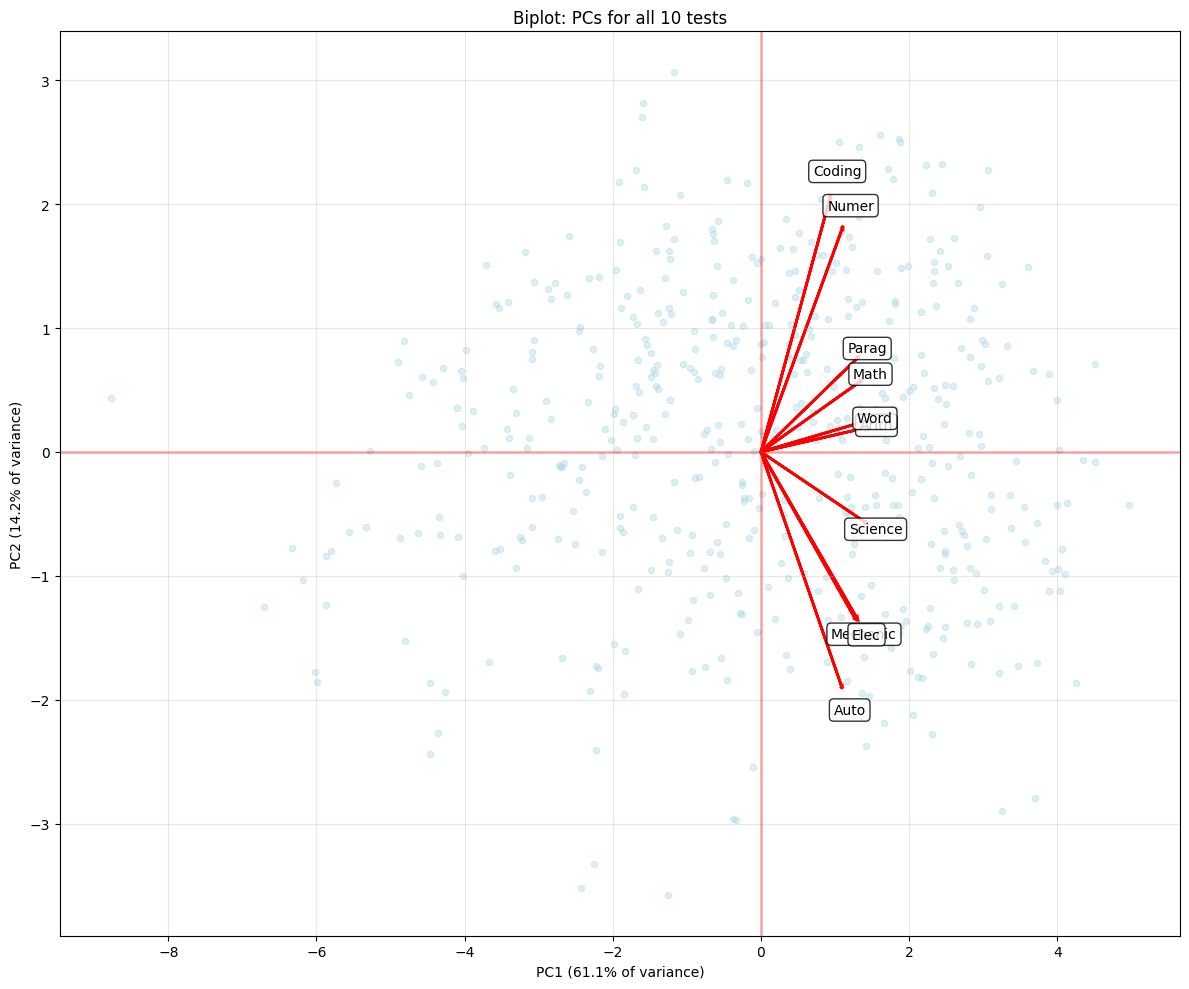

In [ ]:
# 5.3 Biplot
# To visualize the loadings and the correlations among test scores, here it is the biplot

plt.figure(figsize=(12, 10))

# Plot PC scores (people) - sample for visibility
sample_indices = np.random.choice(len(pc_scores_all_tests), 500, replace=False)
plt.scatter(pc_scores_all_tests[sample_indices, 0], pc_scores_all_tests[sample_indices, 1],
            alpha=0.4, s=20, color='lightblue')

# Plot loadings (variables) as arrows
loadings_biplot = pca_all.components_[:2].T  # First two PCs only
scale_factor = 4  # Scale arrows for visibility

for i, (test, loading) in enumerate(zip(test_columns, loadings_biplot)):
    plt.arrow(0, 0, loading[0]*scale_factor, loading[1]*scale_factor,
              head_width=0.02, head_length=0.02, fc='red', ec='red', linewidth=2)
    plt.text(loading[0]*scale_factor*1.1, loading[1]*scale_factor*1.1,
             test, fontsize=10, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.axhline(y=0, color='red', linewidth=2, alpha=0.3)
plt.axvline(x=0, color='red', linewidth=2, alpha=0.3)
plt.xlabel(f'PC1 ({pca_all.explained_variance_ratio_[0]:.1%} of variance)')
plt.ylabel(f'PC2 ({pca_all.explained_variance_ratio_[1]:.1%} of variance)')
plt.title('Biplot: PCs for all 10 tests')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# This biplot is more complex than the 4-test version because we have 10 variables
# We sample 500 people for the scatter plot to avoid overcrowding (np.random.choice with 500)
# The red arrows show all 10 test loadings on PC1 and PC2
# Tests pointing in similar directions are positively correlated
# Tests pointing in opposite directions are negatively correlated
# The length of each arrow shows how strongly that test relates to the first two PCs
# bbox=dict(...) adds white boxes around test labels for better readability

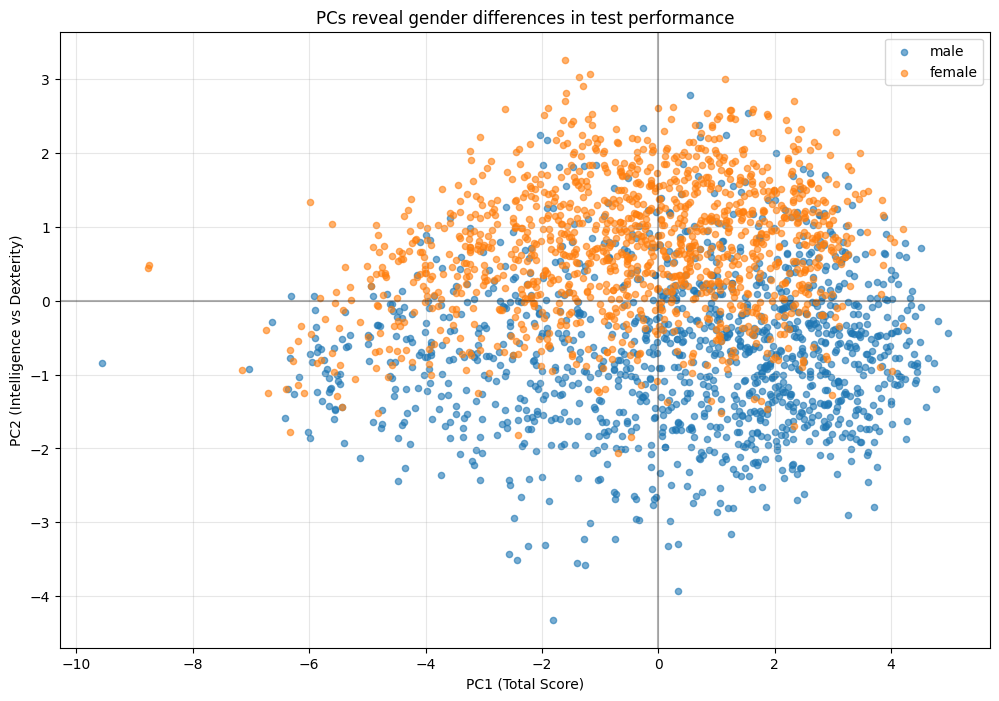

Mean PC scores by gender:
male: PC1 = 0.402, PC2 = -0.710
female: PC1 = -0.411, PC2 = 0.726


In [ ]:
# 5.4 How Gender plays the role here?

plt.figure(figsize=(12, 8))
for gender in ['male', 'female']:
    mask = data_full['Gender'] == gender
    plt.scatter(pc_scores_all_tests[mask, 0], pc_scores_all_tests[mask, 1],
                label=gender, alpha=0.6, s=20)

plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('PC1 (Total Score)')
plt.ylabel('PC2 (Intelligence vs Dexterity)')
plt.title('PCs reveal gender differences in test performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# This scatter plot colors points by gender to look for systematic differences
# mask = data_full['Gender'] == gender creates a boolean filter for each gender
# pc_scores_all_tests[mask, 0] selects PC1 scores only for that gender
# If there are gender differences, we should see separation or clustering by color
# Based on the PC2 interpretation, positive PC2 suggests intelligence strength, negative suggests dexterity strength

print("Mean PC scores by gender:")
for gender in ['male', 'female']:
    mask = data_full['Gender'] == gender
    mean_pc1 = np.mean(pc_scores_all_tests[mask, 0])
    mean_pc2 = np.mean(pc_scores_all_tests[mask, 1])
    print(f"{gender}: PC1 = {mean_pc1:.3f}, PC2 = {mean_pc2:.3f}")

# This calculates average PC scores for each gender to quantify any differences
# mask creates a boolean array selecting only people of that gender
# np.mean() calculates the average PC1 and PC2 scores for that gender group
# If there are systematic differences, we should see different mean values
# For example, if males have lower PC2 on average, it suggests they lean toward dexterity skills

# WOW! Males and females are clearly separated by PC2's! That implies females (red circles) are strong in intelligence and males are strong in dexterity! Does that agree with your intuition?

# Note: A more sophisticated biplot with gender colors would require additional plotting code similar to ggbiplot



Variance explanation summary:
PC1 explains 61.1% of variance
PC2 explains 14.2% of variance
Together, PC1 and PC2 explain 75.3% of variance

Variance verification for 10-test analysis:
Sum of all 10 PC variances: 10.003871
Expected for 10 standardized variables: 10.000000
Difference: 0.00387147
This confirms PCA preserves total variance for the 10-test analysis


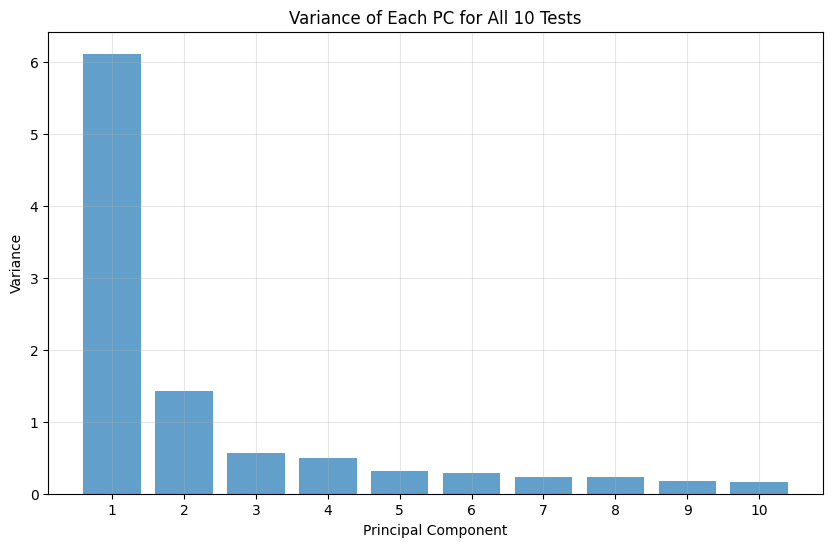

In [ ]:
# 5.5 PVE's
# How much variability do PC1 and PC2 explain?

print("\nVariance explanation summary:")
print(f"PC1 explains {pca_all.explained_variance_ratio_[0]:.1%} of variance")
print(f"PC2 explains {pca_all.explained_variance_ratio_[1]:.1%} of variance")
print(f"Together, PC1 and PC2 explain {pca_all.explained_variance_ratio_[:2].sum():.1%} of variance")
# Variance check for 10-test analysis
print(f"\nVariance verification for 10-test analysis:")
total_var_10 = np.sum(pca_all.explained_variance_)
print(f"Sum of all 10 PC variances: {total_var_10:.6f}")
print(f"Expected for 10 standardized variables: {10.0:.6f}")
print(f"Difference: {abs(total_var_10 - 10.0):.8f}")
print("This confirms PCA preserves total variance for the 10-test analysis")
# This summarizes how much information the first two PCs capture
# pca_all.explained_variance_ratio_[0] gives the proportion for PC1
# pca_all.explained_variance_ratio_[1] gives the proportion for PC2
# [:2].sum() adds up the first two proportions to get the total
# If PC1 and PC2 together explain 75% of variance, we've captured most of the information with just 2 numbers instead of 10

# Bar plot of variances
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca_all.explained_variance_, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Variance of Each PC for All 10 Tests')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)
plt.show()

# This bar chart shows the variance (not proportion) of each PC
# range(1, 11) creates labels 1 through 10 for the x-axis
# The bars should decrease in height from left to right
# The first few bars should be much taller than the rest if PCA is working well

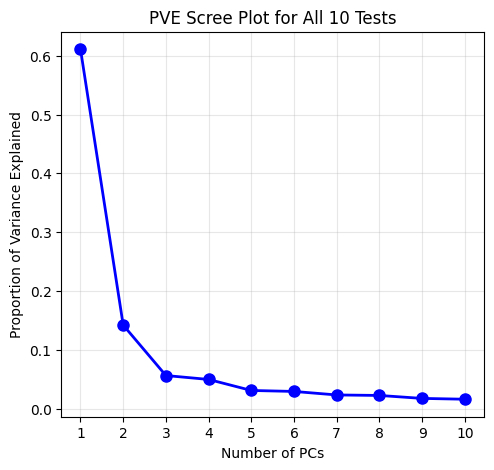

In [ ]:
# PVE plot

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), pca_all.explained_variance_ratio_, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('PVE Scree Plot for All 10 Tests')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)

# This line plot shows the proportion of variance explained by each individual PC
# 'bo-' creates blue circles connected by lines
# The plot should show a steep drop after the first few PCs (the "elbow")
# This helps determine how many PCs to keep for analysis


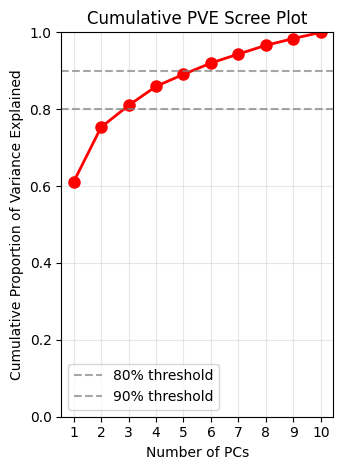

In [ ]:
# We see that PC1 accounts for a large percentage of the total variation in the 10 scores following by PC2 with another portion. With only two leading PC's we have captured a substantial portion of the variance.

# The scree plot of Cumulative PVE's

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), np.cumsum(pca_all.explained_variance_ratio_), 'ro-', markersize=8, linewidth=2)
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative PVE Scree Plot')
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7, label='80% threshold')
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.7, label='90% threshold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# This shows the cumulative (running total) proportion of variance explained
# np.cumsum() calculates running totals: [0.6, 0.75, 0.81, 0.85, ...]
# The horizontal dashed lines at 80% and 90% are common decision thresholds
# If the curve reaches 80% with just 2-3 PCs, those PCs capture most of the information
# plt.tight_layout() adjusts spacing between the two subplots

# A substantial percentage of the total variability are explained or captured by the two leading PC's.
#
# To capture the main features of all the tests we could use two summary scores
#
# PC1: Total scores (weighted)
# PC2: Difference between intelligence(such as math/words?) and dexterity


In [ ]:
# ==================================================================================
# 6 Recap
# ==================================================================================

# Principal Component Analysis finds linear combinations of the variables that capture the most information contained in the full data. We may even find some striking relationships among variables through a few PC's. It is often useful to reveal group information or to identify clusters. All PC's are orthogonal which can be an advantage property when we use them as predictors. The drawback is that we may lose the interpretation based on the original variables.

# ==================================================================================
# 7 Appendix 1: PC definitions via maximizing the variance of linear combinations.
# ==================================================================================

# In this section we write formal definition of PC's with four AFQT tests.

# 7.1 First Principal Component
# Looking for a linear transformation Z₁ of X1=Word, X2=Parag, X3=Math, and X4=Arith to have the max variance.
#
# Z₁ = φ₁₁*X1 + φ₂₁*X2 + φ₃₁*X3 + φ₄₁*X4
#
# such that max Var(Z₁) subject to φ₁₁² + φ₂₁² + φ₃₁² + φ₄₁² = 1

# 7.2 Second Principal Component
# Similarly, looking for another linear transformation Z₂ of X1=Word, X2=Parag, X3=Math, and X4=Arith to have the max variance and Z₁ is orthogonal to Z₂.
#
# Z₂ = φ₁₂*X1 + φ₂₂*X2 + φ₃₂*X3 + φ₄₂*X4
#
# such that max Var(Z₂) subject to φ₁₂² + φ₂₂² + φ₃₂² + φ₄₂² = 1
#
# By definitions we know two sets of loadings are perpendicular: (φ₁₁, φ₂₁, φ₃₁, φ₄₁) and (φ₁₂, φ₂₂, φ₃₂, φ₄₂) are orthogonal.

# 7.3 More PC components
# We keep going to obtain Z3, and Z4

In [ ]:
# ==================================================================================
# 8 Appendix 2: PCA and Eigen decomposition Correlation Matrix
# ==================================================================================

# How to get all the loadings, PC's? There are elegant, simple mathematics behind it.
#
# To find the PC loadings we want to maximize the variance of the linear combination of the variables. Let X=(X₁,X₂, …, Xₚ) be the design matrix. We simply list all values of first variable X₁ for all subjects, and with similar ways to list X₂… So notice that the design matrix is a n × p matrix.
#
# It is easy to show that the PC loadings are nothing but eigenvectors/values of corr(X₁,X₂,…, Xₚ)=X'X/(n-1) (if centered and scaled) or cov(X₁,X₂) (unscaled).
#
# Let us use data_AFQT which has 50 people and 4 variables Word, Parag, Math and Arith.
#
# Eigenvectors of cor(data_AFQT) give us the loadings with ordered PC1, PC2,… Eigenvalues are the variances of PC1, PC2,…

# Calculate correlation matrix and its eigendecomposition
data_AFQT = AFQT_sub[["Word", "Parag", "Math", "Arith"]].copy()
correlation_matrix = np.corrcoef(data_AFQT.T)
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues (PC variances):")
print(np.round(eigenvalues, 3))

print("\nEigenvectors (PC loadings):")
eigenvectors_df = pd.DataFrame(eigenvectors,
                               columns=['Eigvec.1', 'Eigvec.2', 'Eigvec.3', 'Eigvec.4'],
                               index=['Word', 'Parag', 'Math', 'Arith'])
print(eigenvectors_df.round(3))

# This demonstrates the mathematical foundation of PCA using eigendecomposition
# np.corrcoef(data_AFQT.T) calculates the correlation matrix (.T transposes because corrcoef expects variables as rows)
# np.linalg.eig() finds eigenvalues and eigenvectors of the correlation matrix
# eigenvalues are the variances of the principal components
# eigenvectors are the loadings (weights) for each principal component
# We sort them in descending order because PCA orders PCs by decreasing variance
# [::-1] reverses the order (largest first)


Eigenvalues (PC variances):
[3.336 0.344 0.172 0.148]

Eigenvectors (PC loadings):
       Eigvec.1  Eigvec.2  Eigvec.3  Eigvec.4
Word      0.500     0.496     0.473     0.529
Parag     0.500     0.501    -0.521    -0.477
Math      0.497    -0.546    -0.481     0.472
Arith     0.503    -0.453     0.523    -0.519


In [ ]:
# Let us check against PCA output:

# Compare with PCA function results
pca_check = PCA()
data_AFQT_scaled_check = StandardScaler().fit_transform(data_AFQT)
pca_check.fit(data_AFQT_scaled_check)

print("Comparison - PCA function loadings:")
pca_loadings_check = pd.DataFrame(pca_check.components_.T,
                                  columns=['PC1', 'PC2', 'PC3', 'PC4'],
                                  index=['Word', 'Parag', 'Math', 'Arith'])
print(pca_loadings_check.round(3))

print("\nComparison - PCA function variances:")
print(np.round(pca_check.explained_variance_, 3))

print("\nDifference between eigendecomposition and PCA loadings:")
print("(Should be close to zero, possibly with sign differences)")
print(np.round(np.abs(eigenvectors_df.values) - np.abs(pca_loadings_check.values), 3))

# This verifies that PCA results match eigendecomposition results
# The loadings from eigendecomposition should match PCA loadings (up to sign)
# The eigenvalues should match PCA explained variances
# Small differences might occur due to numerical precision
# Sign differences are normal - PC directions can be flipped without changing meaning

# Eigenvectors and PC rotations are the same up to a sign difference. Are you convinced that PC loadings are the same as eigenvectors of correlation matrix of variables?


Comparison - PCA function loadings:
         PC1    PC2    PC3    PC4
Word   0.500 -0.496  0.473  0.529
Parag  0.500 -0.501 -0.521 -0.477
Math   0.497  0.546 -0.481  0.472
Arith  0.503  0.453  0.523 -0.519

Comparison - PCA function variances:
[3.404 0.351 0.176 0.151]

Difference between eigendecomposition and PCA loadings:
(Should be close to zero, possibly with sign differences)
[[-0. -0.  0.  0.]
 [-0.  0. -0. -0.]
 [ 0. -0.  0. -0.]
 [ 0. -0. -0.  0.]]


In [ ]:
# ==================================================================================
# 9 Appendix 3: PCA and SVD
# ==================================================================================

# A matrix X can be decomposed by Singular Value Decomposition (SVD). PC's can be obtained through SVD. SVD is very useful in applications, e.g. matrix completion, recommendation systems. Assume that X is centered and scaled.
#
# Fact: any matrix X can be decomposed as follows:
# X_{n×p} = U_{n×p} D_{p×p} V^T_{p×p}
#
# Here U is column orthonormal and it is called left singular vector for each column. V is right singular vector of orthonormal matrix. D is a diagonal matrix with decreasing values d₁ > d₂,...>dₚ and it is called singular values accordingly.

# 9.1 Properties of SVD
# Matrix rank 1 representation
# Rewrite the matrix SVD to a sum of rank 1 vectors
#
# X_{n×p} = d₁ u₁ v₁^T + d₂ u₂ v₂^T + … dₚ uₚ vₚ^T
#
# Here u's are columns of U and v's are columns of V with norm 1, i.e. ||uⱼ||₂ = 1 for j = 1, …, p.
#
# Since d's are decreasing, we may take top singular vectors to approximate the matrix X.
#
# It is easy to see V is the eigenvectors of X^T X and d²ᵢ are corresponding eigenvalues. So the right singular vectors v₁, v₂... give us the loadings for PC's.
#
# Very easy to prove by plugging in X = U D V^T and noticing that U, V are orthonormal, i.e., U^T U = I and V^T V = I. Immediately we get X^T X V = V D²
#
# X V = U D that means PC scores = U D.
#
# How beautiful!

# 9.2 Compare PCA and SVD
# Let us verify this using SVD function. We use data_AFQT again.

data_AFQT = AFQT_sub[["Word", "Parag", "Math", "Arith"]].copy()
data_AFQT_center_scale = StandardScaler().fit_transform(data_AFQT)

# Perform PCA
pca_svd_check = PCA()
pc_scores_svd_check = pca_svd_check.fit_transform(data_AFQT_center_scale)

# Perform SVD
U, singular_values, Vt = np.linalg.svd(data_AFQT_center_scale, full_matrices=False)

print("SVD components:")
print("U shape (left singular vectors):", U.shape)
print("Singular values:", np.round(singular_values, 3))
print("V^T shape (right singular vectors transposed):", Vt.shape)

# np.linalg.svd() performs Singular Value Decomposition
# It returns U (left singular vectors), singular_values (diagonal of D), and Vt (V transposed)
# full_matrices=False gives us the "thin" SVD which is more efficient for rectangular matrices
# U contains the left singular vectors (n×p matrix)
# singular_values contains the diagonal values d₁, d₂, etc.
# Vt is V^T, the transpose of right singular vectors


SVD components:
U shape (left singular vectors): (50, 4)
Singular values: [12.916  4.145  2.936  2.718]
V^T shape (right singular vectors transposed): (4, 4)


In [ ]:
# 9.2.1 PC loadings
# Right singular vectors V's are PC loadings.

print("\nSVD right singular vectors (PC loadings):")
V = Vt.T  # Transpose to get V from V^T
svd_loadings = pd.DataFrame(V,
                           columns=['PC1', 'PC2', 'PC3', 'PC4'],
                           index=['Word', 'Parag', 'Math', 'Arith'])
print(svd_loadings.round(3))

print("\nPCA loadings for comparison:")
pca_loadings_svd = pd.DataFrame(pca_svd_check.components_.T,
                               columns=['PC1', 'PC2', 'PC3', 'PC4'],
                               index=['Word', 'Parag', 'Math', 'Arith'])
print(pca_loadings_svd.round(3))

# V = Vt.T converts V^T back to V by transposing
# The right singular vectors V should match the PCA loadings exactly (up to sign)
# This verifies the mathematical relationship between SVD and PCA




SVD right singular vectors (PC loadings):
         PC1    PC2    PC3    PC4
Word  -0.500  0.496  0.473  0.529
Parag -0.500  0.501 -0.521 -0.477
Math  -0.497 -0.546 -0.481  0.472
Arith -0.503 -0.453  0.523 -0.519

PCA loadings for comparison:
         PC1    PC2    PC3    PC4
Word   0.500 -0.496  0.473  0.529
Parag  0.500 -0.501 -0.521 -0.477
Math   0.497  0.546 -0.481  0.472
Arith  0.503  0.453  0.523 -0.519


In [ ]:
# Compare with PC loadings

print("\nDifference between SVD and PCA loadings:")
print("(Should be close to zero, possibly with sign differences)")
print(np.round(np.abs(svd_loadings.values) - np.abs(pca_loadings_svd.values), 4))

# This checks if SVD and PCA give identical results
# We use absolute values to ignore sign differences (which don't matter)
# Differences should be very close to zero (within numerical precision)




Difference between SVD and PCA loadings:
(Should be close to zero, possibly with sign differences)
[[-0. -0. -0.  0.]
 [-0.  0. -0.  0.]
 [ 0. -0.  0. -0.]
 [ 0.  0.  0. -0.]]


In [ ]:

# 9.2.2 PC scores
# Let's take a look at PC1 first. PC1 = d₁ u₁

d1_u1 = singular_values[0] * U[:, 0]
pc1_from_pca = pc_scores_svd_check[:, 0]

print("\nFirst 5 PC1 scores comparison:")
comparison_df = pd.DataFrame({
    'SVD: d1*u1': d1_u1[:5],
    'PCA: PC1': pc1_from_pca[:5]
}, index=[f'p{i+1}' for i in range(5)])
print(comparison_df.round(3))

# This demonstrates that PC1 scores equal d₁ × u₁ (first singular value times first left singular vector)
# singular_values[0] is d₁, the first (largest) singular value
# U[:, 0] is u₁, the first column of U (first left singular vector)
# The multiplication gives us the PC1 scores, which should match PCA output exactly




First 5 PC1 scores comparison:
    SVD: d1*u1  PCA: PC1
p1      -1.565     1.565
p2      -1.627     1.627
p3       1.748    -1.748
p4       0.138    -0.138
p5      -2.166     2.166


In [ ]:


# We compare PC scores computed by UD and by PCA function.

pc_scores_from_svd = U * singular_values  # Broadcasting: each column of U multiplied by corresponding singular value
pc_difference = pc_scores_from_svd - pc_scores_svd_check

print("\nDifference between SVD-computed and PCA-computed scores:")
print("First 5 rows of difference matrix (should be close to zero):")
print(pc_difference[:5].round(10))

# U * singular_values uses broadcasting to multiply each column of U by the corresponding singular value
# This is equivalent to U @ np.diag(singular_values) but more efficient
# The result should match PCA PC scores exactly
# Any differences should be within numerical precision (very small numbers like 1e-15)


Difference between SVD-computed and PCA-computed scores:
First 5 rows of difference matrix (should be close to zero):
[[-3.12987384  0.28951064  0.          0.        ]
 [-3.25388126  0.67174937  0.          0.        ]
 [ 3.49570098  0.80248818  0.         -0.        ]
 [ 0.2758393   0.518825   -0.          0.        ]
 [-4.33102865 -1.22051562 -0.         -0.        ]]
